# Eval the results of Flan T5 large

In [1]:
import pandas as pd
from datasets import load_dataset
from sklearn.metrics import f1_score, precision_score, recall_score, \
    accuracy_score

In [3]:

# load
model = 'flan-t5-large'

# load results
zero_shot = pd.read_csv(f"../zero-shot/data/{model}.csv")
zero_shot_with_system = pd.read_csv(
    f"../zero-shot-system_prompt/data/{model}.csv")
zero_shot_cot = pd.read_csv(f"../zero-shot-cot/data/{model}.csv")
two_shot = pd.read_csv(f"../2-shot/data/{model}.csv")
four_shot = pd.read_csv(f"../4-shot/data/{model}.csv")


#load pool
pool = load_dataset('mediabiasgroup/BABE-icl-pool')['train'].to_pandas()

# exclude pool from model (if needed)
zero_shot = zero_shot.merge(pool['text'], on='text', how='left',
                            indicator=True).query(
    '_merge == "left_only"').drop('_merge', axis=1)
zero_shot_with_system = zero_shot_with_system.merge(pool['text'], on='text',
                                                    how='left',
                                                    indicator=True).query(
    '_merge == "left_only"').drop('_merge', axis=1)
zero_shot_cot = zero_shot_cot.merge(pool['text'], on='text', how='left',
                                    indicator=True).query(
    '_merge == "left_only"').drop('_merge', axis=1)
two_shot = two_shot.merge(pool['text'], on='text', how='left',
                          indicator=True).query('_merge == "left_only"').drop(
    '_merge', axis=1)
four_shot = four_shot.merge(pool['text'], on='text', how='left',
                            indicator=True).query(
    '_merge == "left_only"').drop('_merge', axis=1)



#load babe
dataset = load_dataset('mediabiasgroup/BABE-v4')
df_babe = pd.DataFrame(dataset['train'])

# df_merge = babe at begin
df_merge_all_runs = df_babe

# Zero shot

In [4]:
zero_shot.query("label == '?'")

,text,response,raw_data,query,label


In [24]:
# preprocessing

In [5]:
zero_shot = zero_shot.rename(columns={"label": "0_shot_label"})
zero_shot['0_shot_label'] = zero_shot['0_shot_label'].replace('BIASED', 1)
zero_shot['0_shot_label'] = zero_shot['0_shot_label'].replace('NOT BIASED', 0)

df_merge = df_babe.merge(zero_shot[zero_shot['0_shot_label'] != '?'][['text', '0_shot_label']], on='text')
df_merge_all_runs = df_merge_all_runs.merge(zero_shot[zero_shot['0_shot_label'] != '?'][['text', '0_shot_label']], on='text')

ground_truth = df_merge['label']
zero_shot_label = df_merge['0_shot_label']

In [6]:
print("F1-Score with TODO: ", f1_score(ground_truth, zero_shot_label))
print("Precision with TODO: ",
      precision_score(ground_truth, zero_shot_label))
print("Recall with TODO: ",
      recall_score(ground_truth, zero_shot_label))
print("Accuracy with TODO: ",
      accuracy_score(ground_truth, zero_shot_label))

F1-Score with TODO:  0.5924235508900045
Precision with TODO:  0.5428690924299456
Recall with TODO:  0.6519337016574586
Accuracy with TODO:  0.5558318826162646


# zero shot with system prompt

In [7]:
zero_shot_with_system.query("label == '?'")

,text,response,raw_data,query,label


In [8]:
zero_shot_with_system = zero_shot_with_system.rename(
    columns={"label": "0_shot_with_system_label"})
zero_shot_with_system['0_shot_with_system_label'] = zero_shot_with_system[
    '0_shot_with_system_label'].replace('BIASED', 1)
zero_shot_with_system['0_shot_with_system_label'] = zero_shot_with_system[
    '0_shot_with_system_label'].replace('NOT BIASED', 0)

df_merge = df_babe.merge(zero_shot_with_system[zero_shot_with_system['0_shot_with_system_label'] != '?'][['text', '0_shot_with_system_label']], on='text')
df_merge_all_runs = df_merge_all_runs.merge(zero_shot_with_system[zero_shot_with_system['0_shot_with_system_label'] != '?'][['text', '0_shot_with_system_label']], on='text')
 
ground_truth = df_merge['label']
zero_shot_with_system_label = df_merge['0_shot_with_system_label']

In [9]:
print("F1-Score with TODO with System Prompt: ",
      f1_score(ground_truth, zero_shot_with_system_label))
print("Precision with TODO with System Prompt: ",
      precision_score(ground_truth, zero_shot_with_system_label))
print("Recall with TODO with System Prompt: ",
      recall_score(ground_truth, zero_shot_with_system_label))
print("Accuracy with TODO with System Prompt: ",
      accuracy_score(ground_truth, zero_shot_with_system_label))

F1-Score with TODO with System Prompt:  0.6681534344335416
Precision with TODO with System Prompt:  0.600882470918572
Recall with TODO with System Prompt:  0.7523857358111502
Accuracy with TODO with System Prompt:  0.6299428002984332


# zero shot CoT

In [30]:
zero_shot_cot.query("label == '?'")

,text,response,raw_data,query,label
0,But instead of closing loopholes that allow cr...,BIASED is the opposite of not biased.,BIASED is the opposite of not biased.,You are an expert in media bias.\n\nInstructio...,?
1,"""You think I'm joking,"" he continued. """,Not biased is the opposite of biased. So the a...,Not biased is the opposite of biased. So the a...,You are an expert in media bias.\n\nInstructio...,?
2,"Yes, the rich are rich and want to stay that w...","BIASED is the opposite of not biased. So, the ...","BIASED is the opposite of not biased. So, the ...",You are an expert in media bias.\n\nInstructio...,?
3,Americans are carrying $1.57 trillion in outst...,BIASED is the opposite of not biased. The sent...,BIASED is the opposite of not biased. The sent...,You are an expert in media bias.\n\nInstructio...,?
4,Republican state legislators from Texas to Ari...,BIASED is the opposite of not biased. The Repu...,BIASED is the opposite of not biased. The Repu...,You are an expert in media bias.\n\nInstructio...,?
...,...,...,...,...,...
4115,Trump sought to use the event to bring momentu...,BIASED is the opposite of not biased. George F...,BIASED is the opposite of not biased. George F...,You are an expert in media bias.\n\nInstructio...,?
4117,After President Donald Trump’s news conference...,BIASED is the opposite of not biased. George F...,BIASED is the opposite of not biased. George F...,You are an expert in media bias.\n\nInstructio...,?
4118,When Republicans warned Democrats that impeach...,BIASED is the opposite of what the author is t...,BIASED is the opposite of what the author is t...,You are an expert in media bias.\n\nInstructio...,?
4119,Sen. Tom Cotton (R-AR) says it “makes absolute...,BIASED is the opposite of not biased. The pass...,BIASED is the opposite of not biased. The pass...,You are an expert in media bias.\n\nInstructio...,?


In [10]:
# preprocessing
# preprocessing
# preprocessing
def update_label(row):
    if row['response'].startswith('BIASED') and row['label'] == '?':
        return 'BIASED'
    elif row['response'].startswith('NOT BIASED') and row[
        'label'] == '?':
        return 'NOT BIASED'
    elif row['response'].startswith('not biased') and row[
        'label'] == '?':
        return 'NOT BIASED'
    elif row['response'].startswith('Not biased') and row[
        'label'] == '?':
        return 'NOT BIASED'
    elif row['response'].startswith('Not based') and row[
        'label'] == '?':
        return 'NOT BIASED'
    else:
        return row['label']


zero_shot_cot['label'] = zero_shot_cot.apply(update_label, axis=1)
zero_shot_cot.query("label == '?'")

,text,response,raw_data,query,label
777,"Last summer, Romney criticized President Trump...",Not biasing is the opposite of biased. The sen...,Not biasing is the opposite of biased. The sen...,You are an expert in media bias.\n\nInstructio...,?
2172,While emphasizing he’s not singling out either...,Not biasing is the opposite of biased. So the ...,Not biasing is the opposite of biased. So the ...,You are an expert in media bias.\n\nInstructio...,?


In [11]:
zero_shot_cot.loc[ [777, 2172], 'label'] = 'NOT BIASED'

zero_shot_cot.loc[[], 'label'] = 'BIASED'

# undecideable 2860

zero_shot_cot.loc[2172]['response']

'Not biasing is the opposite of biased. So the answer is NOT BIASED.'

In [12]:
zero_shot_cot = zero_shot_cot.rename(columns={"label": "0_shot_cot_label"})
zero_shot_cot['0_shot_cot_label'] = zero_shot_cot['0_shot_cot_label'].replace(
    'BIASED', 1)
zero_shot_cot['0_shot_cot_label'] = zero_shot_cot['0_shot_cot_label'].replace(
    'NOT BIASED', 0)

df_merge = df_babe.merge(zero_shot_cot[zero_shot_cot['0_shot_cot_label'] != '?'][['text', '0_shot_cot_label']], on='text')
df_merge_all_runs = df_merge_all_runs.merge(zero_shot_cot[zero_shot_cot['0_shot_cot_label'] != '?'][['text', '0_shot_cot_label']], on='text')
 
ground_truth = df_merge['label']
zero_shot_cot_label = df_merge['0_shot_cot_label']

In [13]:
print("F1-Score with TODO with CoT: ",
      f1_score(ground_truth, zero_shot_cot_label))
print("Precision with TODO with CoT: ",
      precision_score(ground_truth, zero_shot_cot_label))
print("Recall with TODO with CoT: ",
      recall_score(ground_truth, zero_shot_cot_label))
print("Accuracy with TODO with CoT: ",
      accuracy_score(ground_truth, zero_shot_cot_label))

F1-Score with TODO with CoT:  0.6973227059063969
Precision with TODO with CoT:  0.5878704341833219
Recall with TODO with CoT:  0.8568558513309894
Accuracy with TODO with CoT:  0.6316836607809003


# 2-shot

In [35]:
two_shot.query("label == '?'")

,text,response,raw_data,query,label


In [36]:
# preprocessing

In [14]:
two_shot = two_shot.rename(columns={"label": "2_shot_label"})
two_shot['2_shot_label'] = two_shot['2_shot_label'].replace('BIASED', 1)
two_shot['2_shot_label'] = two_shot['2_shot_label'].replace('NOT BIASED', 0)

df_merge = df_babe.merge(two_shot[two_shot['2_shot_label'] != '?'][['text', '2_shot_label']], on='text')
df_merge_all_runs = df_merge_all_runs.merge(two_shot[two_shot['2_shot_label'] != '?'][['text', '2_shot_label']], on='text')
ground_truth = df_merge['label']
two_shot_label = df_merge['2_shot_label']

In [15]:
print("F1-Score with TODO with (2 shot): ",
      f1_score(ground_truth, two_shot_label))
print("Precision with TODO with (2 shot): ",
      precision_score(ground_truth, two_shot_label))
print("Recall with TODO with (2 shot): ",
      recall_score(ground_truth, two_shot_label))
print("Accuracy with TODO with (2 shot): ",
      accuracy_score(ground_truth, two_shot_label))

F1-Score with TODO with (2 shot):  0.6698700836447765
Precision with TODO with (2 shot):  0.5187431091510474
Recall with TODO with (2 shot):  0.945253641386238
Accuracy with TODO with (2 shot):  0.5386719721462323


# 4-shot

In [16]:
four_shot.query("label == '?'")

,text,response,raw_data,query,label


In [40]:
# preprocessing

In [17]:
four_shot = four_shot.rename(columns={"label": "4_shot_label"})
four_shot['4_shot_label'] = four_shot['4_shot_label'].replace('BIASED', 1)
four_shot['4_shot_label'] = four_shot['4_shot_label'].replace('NOT BIASED', 0)

df_merge = df_babe.merge(four_shot[four_shot['4_shot_label'] != '?'][['text', '4_shot_label']], on='text')
df_merge_all_runs = df_merge_all_runs.merge(four_shot[four_shot['4_shot_label'] != '?'][['text', '4_shot_label']], on='text')
ground_truth = df_merge['label']
four_shot_label = df_merge['4_shot_label']

In [18]:
print("F1-Score with TODO with (4 shot): ",
      f1_score(ground_truth, four_shot_label))
print("Precision with TODO with (4 shot): ",
      precision_score(ground_truth, four_shot_label))
print("Recall with TODO with (4 shot): ",
      recall_score(ground_truth, four_shot_label))
print("Accuracy with TODO with (4 shot): ",
      accuracy_score(ground_truth, four_shot_label))

F1-Score with TODO with (4 shot):  0.6679577464788733
Precision with TODO with (4 shot):  0.5142314990512334
Recall with TODO with (4 shot):  0.952787543947765
Accuracy with TODO with (4 shot):  0.5309624471524497


# Comparison and plots

KeyError: '8_shot_label'

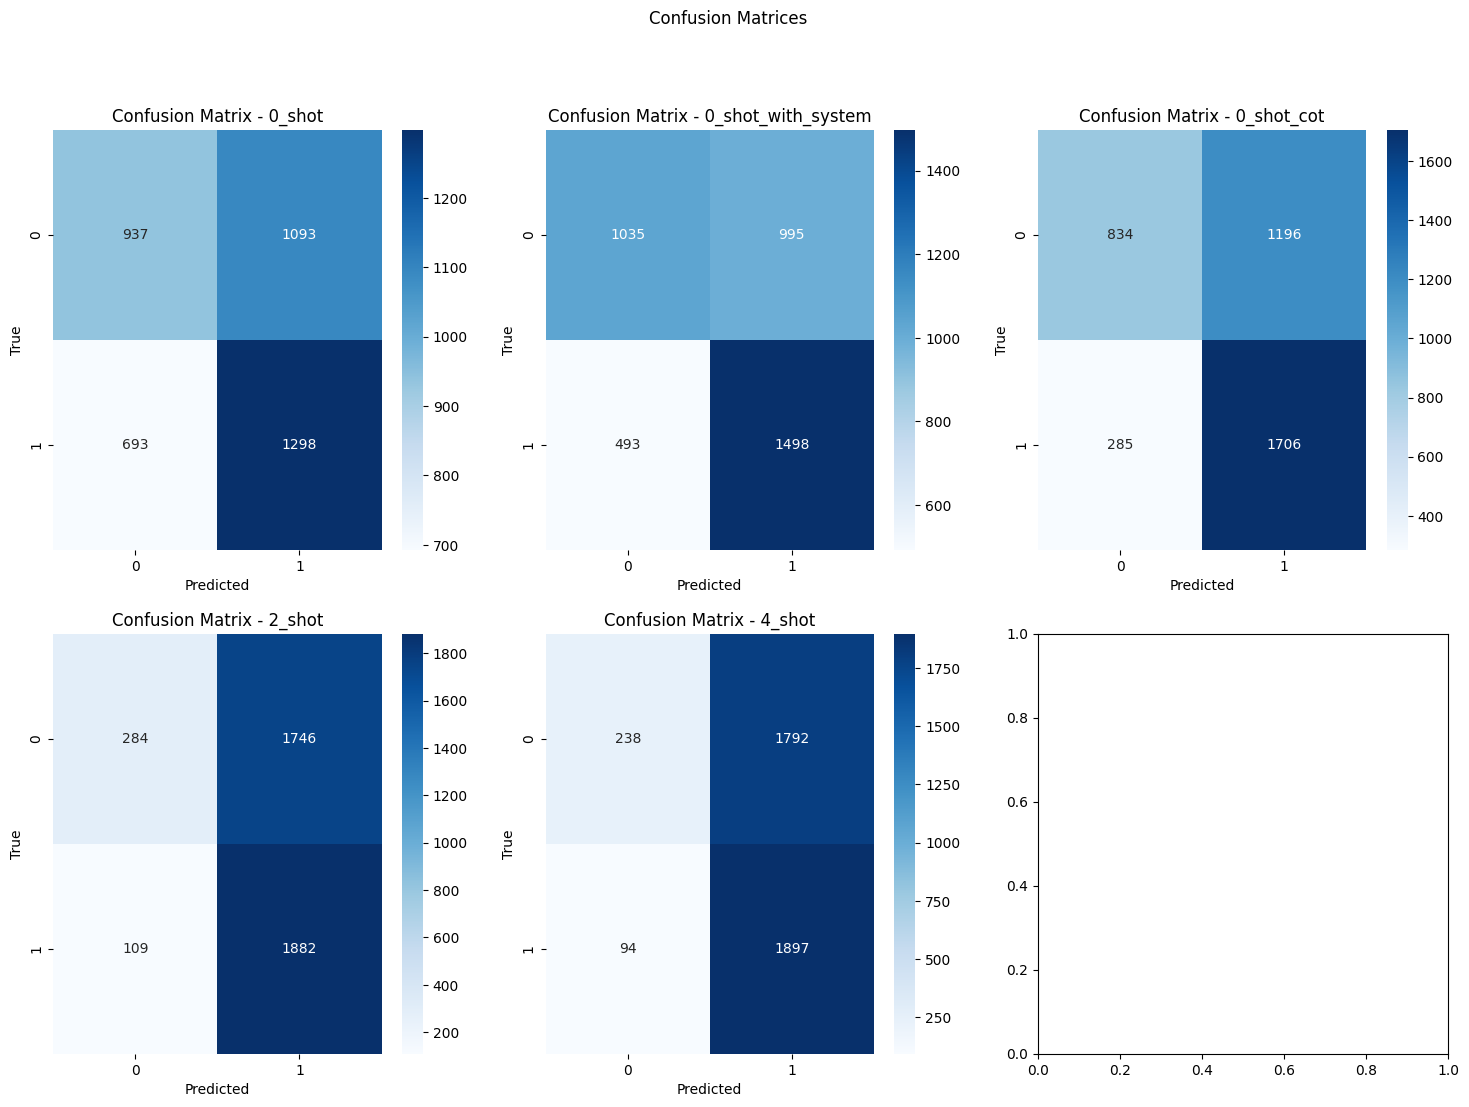

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(ax, df, true_labels_column, predicted_labels_column,
                          title=None
                          ):
    predicted_labels = df[f'{predicted_labels_column}']
    true_labels = df[f'{true_labels_column}']

    # Calculate confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)


    # Display confusion matrix heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=True,
                yticklabels=True, ax=ax)

    title = title if title else predicted_labels_column

    ax.set_title(f'Confusion Matrix - {title}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')


# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Confusion Matrices')

# Plot each confusion matrix
plot_confusion_matrix(axes[0, 0], df_merge, 'label', '0_shot_label', '0_shot')
plot_confusion_matrix(axes[0, 1], df_merge, 'label',
                      '0_shot_with_system_label', '0_shot_with_system')
plot_confusion_matrix(axes[0, 2], df_merge, 'label', '0_shot_cot_label',
                      '0_shot_cot')
plot_confusion_matrix(axes[1, 0], df_merge, 'label', '2_shot_label', '2_shot')
plot_confusion_matrix(axes[1, 1], df_merge, 'label', '4_shot_label', '4_shot')
plot_confusion_matrix(axes[1, 2], df_merge, 'label', '8_shot_label', '8_shot')

plt.tight_layout(
    rect=[0, 0, 1, 0.96])  # Adjust layout to prevent title overlap
plt.show()

# Krippendorff Alpha in model

In [ ]:
import krippendorff

runs = ['0_shot_label', '0_shot_with_system_label', '0_shot_cot_label',
        '2_shot_label', '4_shot_label', '8_shot_label']


def compute_krippendorff_alpha(df, predicted_columns):
    pred_map = {}
    for run in predicted_columns:
        predicted_labels = df[run]
        pred_map[run] = predicted_labels

    # Check if there is variability in the ratings
    unique_labels_counts = df[predicted_columns].nunique(axis=1)
    if unique_labels_counts.max() == 1:
        # All ratings are the same, return a special value or handle accordingly
        return 0

    reliability_data = df[predicted_columns].values.tolist()

    # Calculate Krippendorff's alpha
    alpha = krippendorff.alpha(reliability_data=list(pred_map.values()),
                               level_of_measurement='nominal')

    return alpha


In [ ]:
alpha_value = compute_krippendorff_alpha(df_merge, runs)
print(f"Krippendorff's Alpha (all runs): {alpha_value}")

In [ ]:
import itertools

def compute_krippendorff_alpha_for_k_runs(df, runs, k=None):
    # Initialize variables to store the best combination and alpha
    if k is None:
        k = len(runs)

    best_combination = None
    best_alpha = 0  # Assuming alpha ranges from 0 to 1

    # Iterate through all possible combinations
    for combination in itertools.combinations(runs, k):

        alpha_value = compute_krippendorff_alpha(df, list(combination))

        # Print alpha for the current combination
        print(f"Combination: {combination}, Alpha: {alpha_value}")

        # Update best combination and alpha if a higher alpha is found
        if alpha_value > best_alpha:
            best_alpha = alpha_value
            best_combination = combination

    # Print the best combination and alpha
    print(f"\nBest Combination: {best_combination}, Best Alpha: {best_alpha}")
    return best_alpha, best_combination

In [ ]:
compute_krippendorff_alpha_for_k_runs(df_merge, runs, 2)